## 6.1 주성분분석 (PCA )

#### 1. 주성분분석의 개요 

1) 차원 축소 (dimension reduction) : feature 변수가 매우 많은 다차원 데이터 세트의 차원을 축소해서 새로운 차원의 데이터 세트를 만들기.

* 차원 축소는 왜 필요할까?\
: 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다.

    (교재 377쪽 설명을 보자.)

* 피처 선택(feature selection), 피처 추출(feature extraction)

    feature selection : 중복되거나 중요하지 않은 변수들을 찾아서 버리고 데이터의 특성을 잘 나타내는 중요한 변수만 선택

    feature extraction : 기존 피처들을 압축해서 데이터를 잘 설명할 수 있는 낮은 차원의 데이터로 만들기

2) 피처 추출

    예) 378쪽 : 학생 평가

* 피처 추출 알고리즘 

    PCA (principal component analysis) 
    
    SVD (singular value decomposition)
    
    NMF (non-negative matrix factorization)

- 피처 추출의 용도 : 상당히 많은 피처변수를 가진 데이터를 분류(지도학습)하는 문제가 있다고 하자. 먼저 전체 데이터를 train, test data로 둘로 나눈 다음 train data에 주성분분석을 적용하여 데이터를 변환한다(`비지도학습`). 이어서 그 모델로 변환한 test data에 대해 로지스틱 회귀 등의 분류 알고리즘을 적용한다.

    
 * 피처 추출 활용 분야 (378쪽)
 
     이미지 데이터 처리
     
     텍스트 데이터 처리

#### 2. iris 데이터 분석

* iris data를 불러와서 주성분분석을 연습하자. 주성분분석의 결과는 종종 머신러닝에서 다른 단계 학습의 입력으로 이용된다.

In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = load_iris()

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* 잠깐, 위의 코드 첫 줄은 네 변수들의 이름에 붙은 `(cm)`을 없애기 위한 것이다. 일일이 변수 이름을 적기 귀찮다면 아래와 같이 list comprehension을 이용해서 고쳐도 된다.

In [18]:
iris.feature_names = [name[:-5] for name in iris.feature_names]
iris.feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

네 개의 feature 변수에 대해 **공분산행렬**(cov())을 구해보자. 변수들을 표준화하지 않았으므로 분산값들이 서로 꽤 다르다.

In [19]:
irisDF.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


위의 공분산에서 대각선의 값들은 각 변수들의 분산

In [20]:
irisDF['target']=iris.target

150개 데이터 중에서 처음 세 개, 마지막 세 개를 보자.

In [21]:
display(pd.concat([irisDF.head(3), irisDF.tail(3)]))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


데이터를 전반적으로 살펴보기 위해 [seaborn](https://seaborn.pydata.org/index.html)의 `pairplot()`을 이용하자.

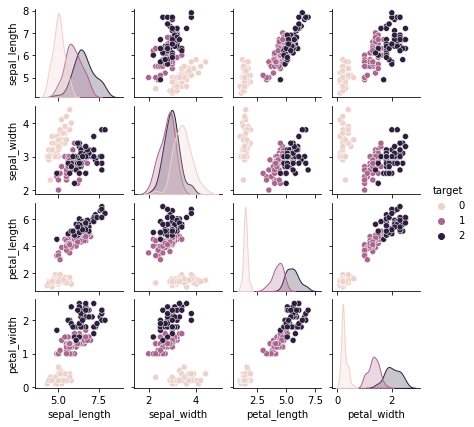

In [22]:
sns.pairplot(irisDF, hue = 'target', height = 1.5)

네 변수 가운데 두 변수를 골라서 그림을 하나만 그리고 싶다면(가령 교재와 같이 `sepal length, sepal width`) 아래처럼 그릴 수 있다.

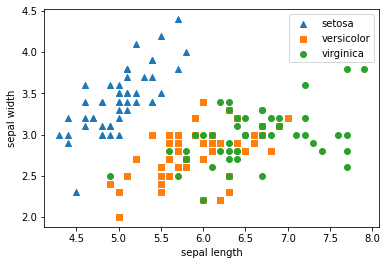

In [23]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend() #그래프에 범례 추가하기
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

위의 그림을 보면 setosa 품종은 sepal length, sepal width 두 개의 변수만으로도 거의 분류할 수 있겠다. 하지만 다른 두 품종은 그렇지 않다. PCA 방법으로 네 변수를 둘로 압축해서 분석해보자. 먼저 피처변수들을 표준화하자.

In [24]:
irisDF.iloc[:, :-1].head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [25]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])  #iloc[ : , : ] = iloc[ 행 , 열 ]

In [26]:
iris_scaled.shape

(150, 4)

`iris_scaled`는 넘파이 배열이므로 아래와 같이 공분산행렬을 구할 수 있다. 이때 `rowvar=False`가 없으면 변수의 수를 150개로 간주하므로 유의할 것.

In [27]:
np.cov(iris_scaled, rowvar = False)  #rowvar = False : 행은 관측치를 나타내며, 열은 변수를 나타낸다. rowvar = False : 행과 열 반대.

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

sklearn.decomposition 안에 있는 클래스 PCA의 객체를 만든 다음, fit()과 transform()을 호출하여 데이터를 변환한다. 만들 변수의 수는 2개로 정하자.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  #변수의 수 지정

pca.fit(iris_scaled)  #타겟데이터 필요없다 : 비지도학습
iris_pca = pca.transform(iris_scaled)

print(iris_pca.shape)

(150, 2)


In [29]:
iris_pca[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

* 공분산행렬의 스펙트럴 분해

위의 결과가 어떤 과정으로 나왔는지 직접 확인해보자.

In [30]:
from numpy.linalg import inv, det, eig
cov_m = np.cov(iris_scaled, rowvar = False)
eig_iris = eig(cov_m)

In [31]:
eig_iris

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

고유치들을 보자. 크기 순서대로 되어있다.

In [32]:
eig_iris[0]

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

고유벡터들도 보자.

In [33]:
eig_iris[1]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

네 개의 고유벡터 가운데 우리는 첫번째 두 개만 필요하다.

In [34]:
eig_vec = eig_iris[1][:, :2]
eig_vec

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

iris_scaled 데이터를 두 개의 고유벡터 축에 투영시켜보자.

In [35]:
pca_iris = iris_scaled.dot(eig_vec)  #dot() : 내적
pca_iris[:3]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802]])

앞에서 살펴본 `iris_pca[:3]`의 결과와 비교해보라. 같으면 위의 설명이 타당하다.\
: 같다. (부호는 상관없다.)

spectral 분해 확인 : 공분산행렬을 $ \mathbf C$, 고유벡터 행렬을 $ \mathbf P$, 고유치로 이루어진 대각행렬을 $ \mathbf {\Sigma} $라고 할 때 $ \mathbf C =  \mathbf P  \mathbf \Sigma  \mathbf P^T $임을 확인해보자.

In [36]:
eig_iris[1].dot(np.diag(eig_iris[0])).dot(eig_iris[1].T)  #diag() : 대각행렬

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

위의 결과를 `iris_scaled`의 공분산 행렬과 비교해보라. 같으면 OK.

사이킷런의 PCA는 **특이값분해**

$$  \mathbf C =  \mathbf U  \mathbf \Sigma  \mathbf V^T $$

를 이용해서 주성분을 계산한다 (실제로 특이값분해 결과를 보려면 `np.linalg.svd()` 또는 `scipy.linalg.svd()` 이용).

`np.linalg.svd()`의 결과는 세 항목으로 된 튜플이다. 위의 결과를 `np.linalg.eig()`로 계산한 결과와 비교해보자.

In [37]:
U, s, Vt = np.linalg.svd(cov_m)

In [39]:
print('U : ' , U)
print('s : ' , s)
print('Vt : ', Vt)

U :  [[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]
s :  [2.93808505 0.9201649  0.14774182 0.02085386]
Vt :  [[-0.52106591  0.26934744 -0.5804131  -0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]


처음 두 주성분은 `Vt.T`의 첫 두 컬럼이다. `np.linalg.eig()`로 계산한 결과와 비교해보면 부호만 서로 다르다. 이제 아래와 같이 원래데이터를 투영하면 새로운 데이터를 얻게된다.

In [27]:
svd_iris = iris_scaled.dot(Vt.T[:, :2])
svd_iris[:3]

array([[ 2.26470281, -0.4800266 ],
       [ 2.08096115,  0.67413356],
       [ 2.36422905,  0.34190802]])

- 교재에서는 6.4절에서 SVD와 truncated SVD에 대해 설명하고 사이킷런의 TruncatedSVD 클래스를 이용해서 iris data를 분석하는 과정도 설명하고 있다. 또한 6.5절에서는 다른 행렬 분해방법으로 NMF(Non-negative Matrix Factorization)도 간단히 소개하고 있다. 우리 수업에서는 **6.2 PCA와 6.3 LDA를 공부**하고 6.4, 6.5절은 생략한다.

* 변환된 데이터 시각화

원래 4개였던 변수가 둘로 압축되었다. 새로 만든 변수를 `pca_component_1, pca_component_2`라고 부르자.

In [28]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


변수가 둘이므로 데이터를 평면 상에 시각화할 수 있다.

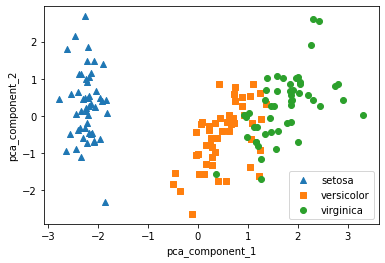

In [29]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()  #그래프에 범례 추가하기
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

그림을 보면 `versicolor`와 `virginica` 품종이 조금 섞여있기는 하지만 두 개의 새로운 변수가 그런대로 세 품종을 잘 분류하고 있다. 각 변수가 데이터의 변동을 얼마씩 설명하는지 알아보자.

In [30]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


즉 첫번째 축이 약 73%, 두번째 축이 약 23%를 설명한다. 두 축이 전체 변동의 96% 정도를 설명하고 있으므로 두 개의 주성분만으로 데이터를 설명하는 것이 좋겠다. 원본 데이터와 변환된 데이터를 각각 `랜덤포레스트 방법`으로 분류한 다음 정확도를 비교해보자.  

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [32]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


변수의 수를 줄인 데이터로 분류하면 당연히 정확도는 떨어지지만 두 개의 변수만으로도 데이터의 변동을 상당히 잘 설명하고 있다.

### 3. credit card 데이터 세트 PCA 변환

이번에는 신용카드 연체 고객 데이터를 불러와서 차원축소를 연습해보자. 교재 387-389쪽과 같이 [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)로부터 Excel 파일(`default of credit card clients.xls`)을 다운로드해서 분석하자. 파일 이름이 길기 때문에 교재에서는 `credit_card.xls`로 이름을 바꾸었다.

UCI 사이트 대신 [캐글](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset?select=UCI_Credit_Card.csv)에서 csv파일(Default of Credit Card Clients Dataset Default Payments of Credit Card Clients in Taiwan from 2005)을 불러와도 된다. 

데이터 수는 3만개이며 변수의 수는 24개(id 변수를 포함하면 25개)이며 그 가운데 연체 여부를 나타내는 변수(target 변수)는 `default.payment.next.month`이다.

In [34]:
df_credit = pd.read_csv('UCI_Credit_Card.csv')
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
df_credit.shape

(30000, 25)

엑셀 파일을 다운로드하여 엑셀에서 파일을 열어보면 첫 행에 쓸모없는 변수명이 들어있다. 따라서 아래 코드에서는 `header = 1`로 지정하여 1번 행에서 열이름을 읽어들인다. 또한 id 변수도 필요없으므로 `iloc[:, 1:]`라고 지정하여 0번째 컬럼을 제외시켰다.

In [42]:
#엑셀 파일 읽기

df = pd.read_excel('credit_card.xls', header=1).iloc[:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


위의 (30000, 24) : id drop

변수의 이름을 살펴보면 `PAY_0`의 이름을 `PAY_1`로 바꾸는 것이 좋겠다. 또한 target 변수인 `default payment next month` 변수의 이름이 너무 길기 때문에 간단히 `default`로 바꾸자. 판다스 데이터프레임의 컬럼 이름을 바꿀 때에는 아래와 같은 형식으로 `rename()` 함수를 이용하면 된다.

In [43]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [44]:
X_features.shape

(30000, 23)

위의 (30000, 24) : id, target data drop

In [45]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

피처 변수들 사이의 상관관계를 그림으로 그려서 살펴보자. 아래에 있는 heatmap은 행렬(2차원 배열) 형식의 데이터에 대해 데이터의 숫자 값에 따라 칸마다 다른 색으로 그림을 그려준다. seaborn 패키지의 `heatmap()` 그림에 대한 [도움말](https://seaborn.pydata.org/generated/seaborn.heatmap.html)을 먼저 보자.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()

아래 코드 중에서 `sns.heatmap(corr, annot=True, fmt='.1g')`를 잠깐 보자. `corr`는 heatmap 그림을 그릴 데이터이고 `annot= True` 옵션은 각 칸에 상관계수 숫자를 나타내라는 뜻이다. 그리고 `fmt = .1g`는 나타낼 숫자들의 형식이다. 표현 형식에 대해 자세히 살펴볼 필요는 없고 `fmt = .2f`, `fmt = .2g` 등으로 바꿔서 그림을 그린 다음 결과들을 서로 비교해보자. 어느 것이 나은가?

<AxesSubplot:>

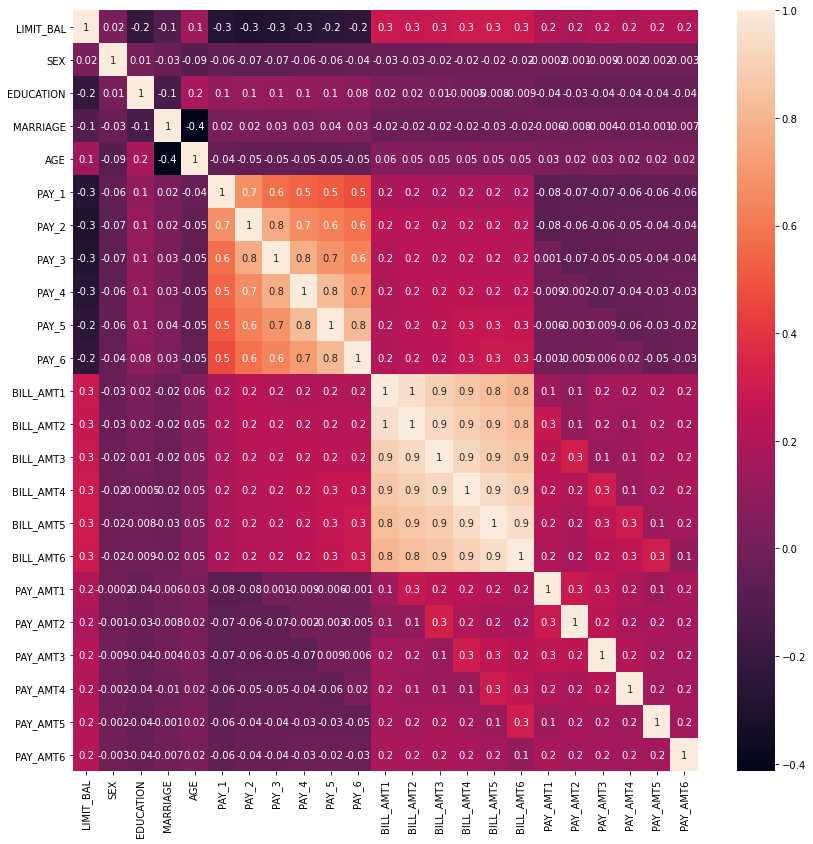

In [47]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

<AxesSubplot:>

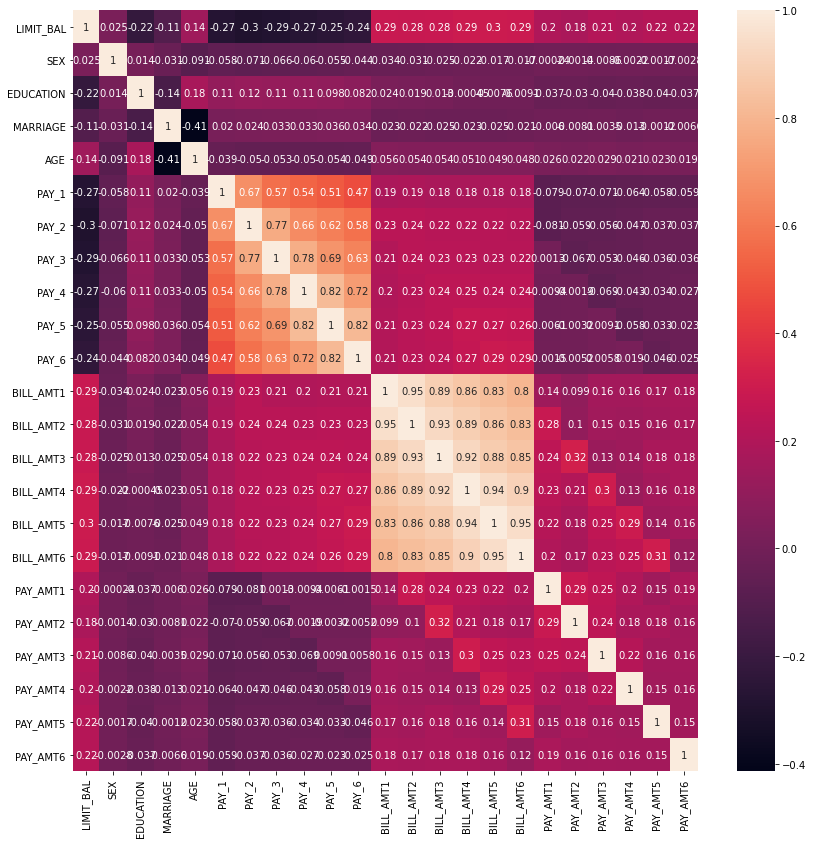

In [48]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2g')

<AxesSubplot:>

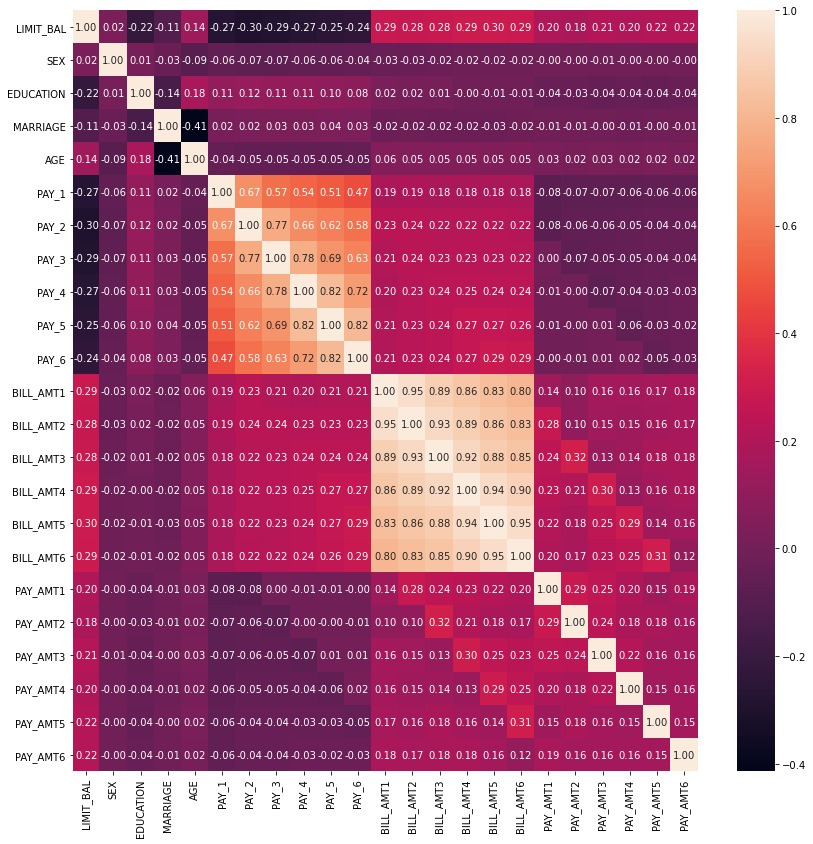

In [49]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f')

`상관계수가 큰 값을 갖는 관계들은 위의 heatmap 그림에서 밝은 색으로 표시된다.` 23개 변수들을 서로 짝지어서 상관관계를 알아본 결과 BILL_AMT 변수 여섯 개들끼리의 상관관계가 높으며 PAY_ 변수 6개들 역시 높은 상관관계를 나타낸다.

 BILL_AMT1부터  BILL_AMT6까지 여섯 변수를 StandardScaler로 표준화한 다음 두 개의 주성분 변수로 변환해보자.

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
#cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
#cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


'BILL_AMT1'부터 'BILL_AMT6'까지 6개의 변수를 표준화한 다음, 2개의 PCA 변수로 줄이고 explained_variance_ratio_를 알아보자. 

In [51]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


두 개의 주성분 변수로 6개 변수의 변동을 95% 이상 설명할 수 있다. 그렇다면 카드 연체 여부를 분류하기 위해 23개 변수를 모두 이용할 필요는 없겠고 더 적은 수의 주성분 변수를 만들어 분류해도 될 것 같다. 

먼저 원본 데이터에 있는 전체 변수로 카드 연체 여부를 얼마나 잘 예측할 수 있는지 알아보자. 분류방법은 랜덤포레스트를 이용한다.

In [52]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


위의 결과를 보면 원본 데이터에 있는 전체 변수로 카드 연체 여부를 예측하면 평균 정확도가 81.7%로 나왔다. 이제 전체 피처 변수를 scaling 변환한 다음 6개의 PCA 성분만으로 분류하여 결과를 비교해보자.

In [53]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7905 0.7968 0.8012]
PCA 변환 데이터 셋 평균 정확도:0.7962


약 2퍼센트포인트 정도 평균 정확도가 낮아졌다. 즉 6개의 PCA 성분만으로 분류해도 23개 전체 피처변수를 다 이용했을 때에 비해 심각하게 정확도가 떨어지지 않았다.